# TSP - solved using Genetic Algorithm
Arnau Claramunt  -  DV2618

In [1]:
# Imports 
import numpy as np
import random
from datetime import datetime

In [2]:
# Parameters
n_cities = 20

n_population = 50      # Population size (parameter that can be changed)  # 10, 20, 50, 100

mutation_rate = 0.1     # (parameter that can be changed)  # 0.9 0.6 0.3 0.1

In [3]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict

{'Berlin': [65, 43],
 'London': [73, 59],
 'Moscow': [91, 0],
 'Barcelona': [21, 94],
 'Rome': [9, 84],
 'Paris': [27, 95],
 'Vienna': [71, 13],
 'Munich': [62, 35],
 'Istanbul': [9, 70],
 'Kyiv': [69, 86],
 'Bucharest': [4, 17],
 'Minsk': [87, 4],
 'Warsaw': [23, 88],
 'Budapest': [89, 71],
 'Milan': [21, 34],
 'Prague': [27, 73],
 'Sofia': [66, 89],
 'Birmingham': [26, 13],
 'Brussels': [92, 97],
 'Amsterdam': [66, 60]}

In [4]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set

array([['Kyiv', 'Amsterdam', 'Brussels', 'Warsaw', 'Rome', 'Prague',
        'Minsk', 'Barcelona', 'Istanbul', 'Munich', 'Berlin', 'Milan',
        'Paris', 'Moscow', 'Sofia', 'Bucharest', 'Vienna', 'London',
        'Birmingham', 'Budapest'],
       ['Kyiv', 'London', 'Munich', 'Berlin', 'Istanbul', 'Birmingham',
        'Prague', 'Brussels', 'Moscow', 'Rome', 'Budapest', 'Amsterdam',
        'Sofia', 'Warsaw', 'Minsk', 'Barcelona', 'Bucharest', 'Vienna',
        'Paris', 'Milan'],
       ['Birmingham', 'Vienna', 'Prague', 'Brussels', 'Munich', 'Berlin',
        'Istanbul', 'Paris', 'Minsk', 'Warsaw', 'Barcelona', 'Budapest',
        'Milan', 'Bucharest', 'Moscow', 'Sofia', 'Rome', 'London',
        'Amsterdam', 'Kyiv'],
       ['Barcelona', 'Berlin', 'Brussels', 'Moscow', 'Munich', 'London',
        'Warsaw', 'Paris', 'Rome', 'Birmingham', 'Amsterdam', 'Minsk',
        'Budapest', 'Kyiv', 'Vienna', 'Prague', 'Sofia', 'Milan',
        'Bucharest', 'Istanbul'],
       ['Birmingham', 'B

In [5]:
# fitness function, calculates total distance between pairs of consecutive cities
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [6]:
# obtain the global fitness of all the individuals of the population
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list

array([1151.34257653, 1223.67330256, 1093.51923005, 1008.03723746,
       1154.22532284, 1185.37069332,  853.75159685, 1150.51403386,
       1287.42134738, 1028.3614354 , 1252.34849797, 1296.82636483,
        992.13853615,  972.44363805, 1072.71447869, 1065.53675837,
       1047.72585386, 1168.75680079,  992.74813252, 1126.98138739,
       1162.66918188, 1141.84551628, 1218.57562574, 1237.17325278,
       1115.33013435, 1033.22022364, 1024.60516045, 1077.05624466,
       1260.9977305 ,  974.55408317, 1029.35341754, 1010.86413611,
       1036.62956724,  876.0860591 , 1242.69294592, 1081.26345771,
       1058.25386179, 1141.04157368, 1009.56373212, 1119.5897876 ,
        938.12528664, 1276.11279122, 1220.81655658, 1098.68637226,
       1172.69212629, 1164.18731812, 1121.74147877, 1004.36450098,
       1202.34608004, 1044.41940522])

In [7]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = (total_fit/fitnes_list)
    prob_list = prob_list/prob_list.sum()
    
    #Notice there is the chance that a progenitor. mates with oneself (replace parameter, allow individual selected multiple times)
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]

array(['Kyiv', 'Barcelona', 'Berlin', 'Amsterdam', 'London', 'Warsaw',
       'Milan', 'Brussels', 'Moscow', 'Bucharest', 'Istanbul', 'Minsk',
       'Birmingham', 'Budapest', 'Sofia', 'Paris', 'Munich', 'Rome',
       'Prague', 'Vienna'], dtype='<U10')

In [8]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring
            
    
    
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
        
    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['Minsk', 'Kyiv', 'Paris', 'Brussels', 'Vienna', 'Warsaw',
       'Bucharest', 'Moscow', 'Milan', 'Prague', 'Munich', 'Barcelona',
       'London', 'Sofia', 'Istanbul', 'Amsterdam', 'Rome', 'Budapest',
       'Birmingham', 'Berlin'], dtype='<U10')

In [9]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
    
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['Minsk', 'London', 'Munich', 'Brussels', 'Vienna', 'Warsaw',
       'Bucharest', 'Moscow', 'Milan', 'Prague', 'Paris', 'Barcelona',
       'Kyiv', 'Sofia', 'Istanbul', 'Amsterdam', 'Rome', 'Budapest',
       'Birmingham', 'Berlin'], dtype='<U10')

In [ ]:
'''
best_solution = [-1,np.inf,np.array([])]
for i in range(5000):    # first: 10000
    if i%50==0: print(i, best_solution[1], fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))  # every 50 iterations
    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)
    
    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)
'''

# output parameters:
# iteration  best solution (min fitness)  mean of fitness

In [ ]:
best_solution

---
## Testing the results and changing Parameters

0 inf 1104.3858966647742 01/10/24 10:46
200 728.6974980284429 1122.9707355995392 01/10/24 10:46
400 717.8349339243136 1109.3839923303422 01/10/24 10:46
600 717.8349339243136 1112.1062560212085 01/10/24 10:46
800 717.8349339243136 1126.7850063851035 01/10/24 10:46
1000 677.2307582242526 1125.8804803659523 01/10/24 10:46
1200 677.2307582242526 1107.2549418714627 01/10/24 10:46
1400 677.2307582242526 1099.3594981470753 01/10/24 10:46
1600 677.2307582242526 1114.223176615549 01/10/24 10:46
1800 677.2307582242526 1120.6282589684226 01/10/24 10:47
2000 677.2307582242526 1116.695783152606 01/10/24 10:47
2200 677.2307582242526 1119.0663832460887 01/10/24 10:47
2400 677.2307582242526 1112.7926160563065 01/10/24 10:47
2600 677.2307582242526 1128.2023881918874 01/10/24 10:47
2800 677.2307582242526 1099.8032445289284 01/10/24 10:47
3000 677.2307582242526 1094.2871487871976 01/10/24 10:47
3200 677.2307582242526 1099.0069996780771 01/10/24 10:47
3400 677.2307582242526 1093.937687521714 01/10/24 10:4

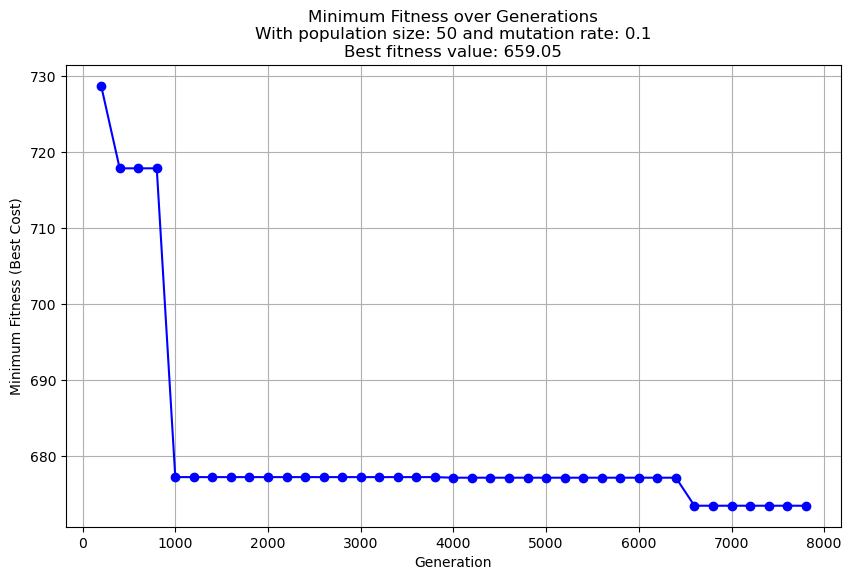

In [10]:
import matplotlib.pyplot as plt

# initialize best solution
best_solution = [-1, np.inf, np.array([])]
# initialize lists to store data for plotting
generations = []    # to store the iteration numbers
min_fitnesses = []  # to store the minimum fitness at each iteration

iter_generations = 8000  #10000   # number of iterations (can be changed)  

for i in range(iter_generations):
    
    # every x iterations, print progress and record the data for plotting
    iterations_for_information = 200     # 50 initially   # 200 works good
    
    if i % iterations_for_information == 0:
        
        print(i, best_solution[1], fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
        
        generations.append(i)
        min_fitnesses.append(best_solution[1])

    # calculate fitness for all individuals in the population
    fitnes_list = get_all_fitnes(mutated_pop, cities_dict)
    
    
    # save the best solution if current fitness is better (lower)
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    # evolve the population
    progenitor_list = progenitor_selection(population_set, fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)


# plotting the results
plt.figure(figsize=(10, 6))
plt.plot(generations, min_fitnesses, marker='o', linestyle='-', color='b')
plt.title(f'Minimum Fitness over Generations\nWith population size: {n_population} and mutation rate: {mutation_rate}\nBest fitness value: {round(best_solution[1], 2)}')

plt.xlabel('Generation')
plt.ylabel('Minimum Fitness (Best Cost)')
plt.grid(True)

# save the plot as an image
filename = f'plot_population_{n_population}_mutation_{mutation_rate}_{iter_generations}it.png'
plt.savefig(filename,format='png')

plt.show()